In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=98f01c18c8db02063e7c2f8207a1669a


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | borogontsy
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | hofn
Processing Record 6 of Set 1 | nuuk
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | bathsheba
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | lima
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | shiyan
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | san patricio
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 18 of Set 1 | sioux lookout
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | evans
Processing Record 21 of Set 1 | haines ju

Processing Record 38 of Set 4 | longyearbyen
Processing Record 39 of Set 4 | cayenne
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | udachnyy
Processing Record 43 of Set 4 | narsaq
Processing Record 44 of Set 4 | te anau
Processing Record 45 of Set 4 | saldanha
Processing Record 46 of Set 4 | horsham
Processing Record 47 of Set 4 | marystown
Processing Record 48 of Set 4 | bur gabo
City not found. Skipping...
Processing Record 49 of Set 4 | buala
Processing Record 50 of Set 4 | tazovskiy
Processing Record 1 of Set 5 | fengkou
Processing Record 2 of Set 5 | kulhudhuffushi
Processing Record 3 of Set 5 | solnechnyy
Processing Record 4 of Set 5 | plettenberg bay
Processing Record 5 of Set 5 | ballitoville
Processing Record 6 of Set 5 | beloha
Processing Record 7 of Set 5 | ulaanbaatar
Processing Record 8 of Set 5 | dingle
Processing Record 9 of Set 5 | camalu
Processing Record 10 of Set 5 | melville
Processing Record 11 of Se

Processing Record 30 of Set 8 | acatlan
Processing Record 31 of Set 8 | koumac
Processing Record 32 of Set 8 | brigantine
Processing Record 33 of Set 8 | sosnovo-ozerskoye
Processing Record 34 of Set 8 | mayumba
Processing Record 35 of Set 8 | moshenskoye
Processing Record 36 of Set 8 | nikel
Processing Record 37 of Set 8 | turek
Processing Record 38 of Set 8 | vila franca do campo
Processing Record 39 of Set 8 | zhicheng
Processing Record 40 of Set 8 | andenes
Processing Record 41 of Set 8 | kaitangata
Processing Record 42 of Set 8 | karamken
City not found. Skipping...
Processing Record 43 of Set 8 | kushiro
Processing Record 44 of Set 8 | mahibadhoo
Processing Record 45 of Set 8 | aykhal
Processing Record 46 of Set 8 | labytnangi
Processing Record 47 of Set 8 | pemberton
Processing Record 48 of Set 8 | killybegs
Processing Record 49 of Set 8 | jennersdorf
Processing Record 50 of Set 8 | iqaluit
Processing Record 1 of Set 9 | itaituba
Processing Record 2 of Set 9 | elbistan
Processin

City not found. Skipping...
Processing Record 16 of Set 12 | port blair
Processing Record 17 of Set 12 | kochi
Processing Record 18 of Set 12 | ossora
Processing Record 19 of Set 12 | fort-shevchenko
Processing Record 20 of Set 12 | maniitsoq
Processing Record 21 of Set 12 | bani walid
Processing Record 22 of Set 12 | martil
Processing Record 23 of Set 12 | kaduqli
Processing Record 24 of Set 12 | pytalovo
Processing Record 25 of Set 12 | hovd
Processing Record 26 of Set 12 | ixtapa
Processing Record 27 of Set 12 | oriximina
Processing Record 28 of Set 12 | mehamn
Processing Record 29 of Set 12 | aksay
Processing Record 30 of Set 12 | redwater
Processing Record 31 of Set 12 | korla
Processing Record 32 of Set 12 | balaipungut
Processing Record 33 of Set 12 | conceicao do araguaia
Processing Record 34 of Set 12 | vestmannaeyjar
Processing Record 35 of Set 12 | kirakira
Processing Record 36 of Set 12 | wahran
City not found. Skipping...
Processing Record 37 of Set 12 | broken hill
Proces

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,2.17,80,75,15.75,RU,2022-02-11 19:11:06
1,Atuona,-9.8000,-139.0333,77.65,76,8,14.50,PF,2022-02-11 19:11:07
2,Borogontsy,62.6683,131.1683,-37.66,100,91,1.79,RU,2022-02-11 19:11:07
3,Thompson,55.7435,-97.8558,-13.13,77,6,8.12,CA,2022-02-11 19:11:08
4,Hofn,64.2539,-15.2082,30.56,76,100,20.42,IS,2022-02-11 19:11:09
5,Nuuk,64.1835,-51.7216,30.81,93,100,31.07,GL,2022-02-11 19:11:09
6,Nanortalik,60.1432,-45.2371,30.07,80,100,5.70,GL,2022-02-11 19:11:10
7,Bathsheba,13.2167,-59.5167,84.81,54,20,27.63,BB,2022-02-11 19:11:10
8,Pevek,69.7008,170.3133,-27.45,99,96,7.00,RU,2022-02-11 19:11:11
9,Lima,-12.0432,-77.0282,80.91,63,0,10.36,PE,2022-02-11 19:08:19


In [24]:
correct_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']






In [25]:
city_data_df = city_data_df[correct_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-02-11 19:11:06,71.9667,102.5000,2.17,80,75,15.75
1,Atuona,PF,2022-02-11 19:11:07,-9.8000,-139.0333,77.65,76,8,14.50
2,Borogontsy,RU,2022-02-11 19:11:07,62.6683,131.1683,-37.66,100,91,1.79
3,Thompson,CA,2022-02-11 19:11:08,55.7435,-97.8558,-13.13,77,6,8.12
4,Hofn,IS,2022-02-11 19:11:09,64.2539,-15.2082,30.56,76,100,20.42
...,...,...,...,...,...,...,...,...,...
580,Nykoping,SE,2022-02-11 19:28:52,58.7530,17.0079,30.24,59,0,11.50
581,San Cristobal,VE,2022-02-11 19:28:53,7.7669,-72.2250,68.18,57,84,3.24
582,Carutapera,BR,2022-02-11 19:28:53,-1.1950,-46.0200,83.77,68,97,7.52
583,Yaan,NG,2022-02-11 19:28:54,7.3833,8.5667,87.69,9,2,4.68


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


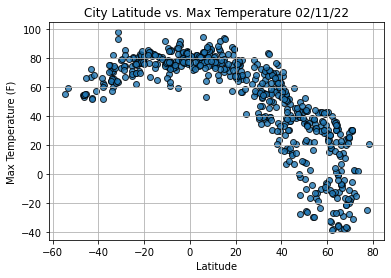

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

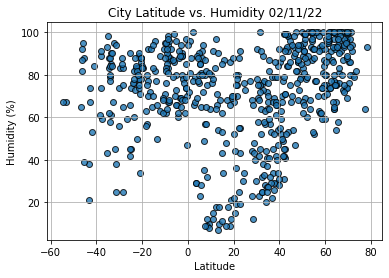

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

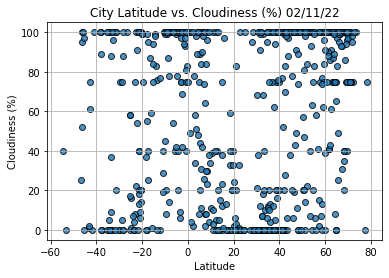

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

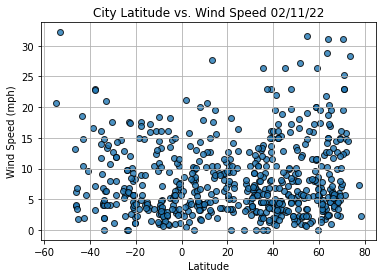

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                 San Patricio
Country                        US
Date          2022-02-11 19:11:13
Lat                        28.017
Lng                      -97.5169
Max Temp                    78.78
Humidity                       44
Cloudiness                      0
Wind Speed                   7.47
Name: 13, dtype: object

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-02-11 19:11:06,71.9667,102.5000,2.17,80,75,15.75
2,Borogontsy,RU,2022-02-11 19:11:07,62.6683,131.1683,-37.66,100,91,1.79
3,Thompson,CA,2022-02-11 19:11:08,55.7435,-97.8558,-13.13,77,6,8.12
4,Hofn,IS,2022-02-11 19:11:09,64.2539,-15.2082,30.56,76,100,20.42
5,Nuuk,GL,2022-02-11 19:11:09,64.1835,-51.7216,30.81,93,100,31.07


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

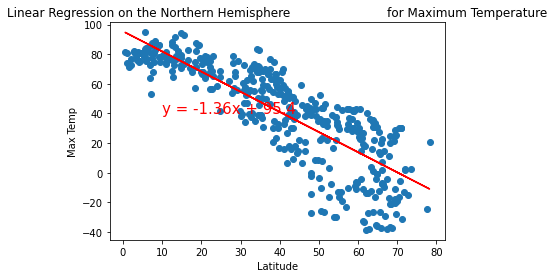

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


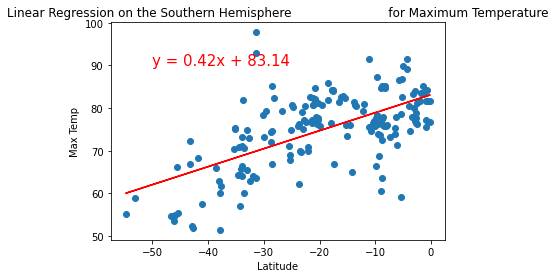

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

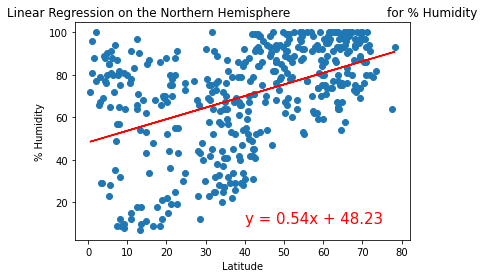

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


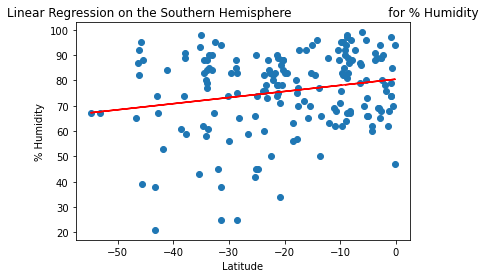

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


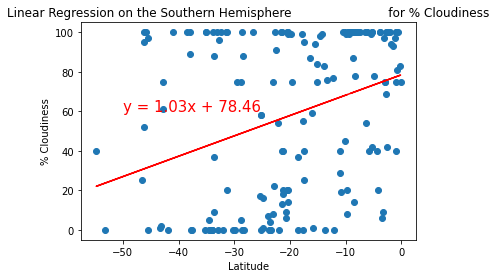

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

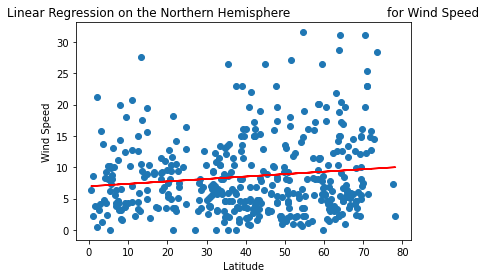

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

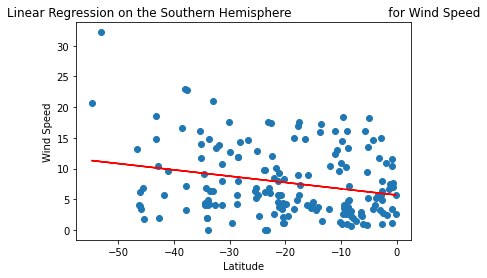

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))